# Model Overview

**Objective**</br>
The objective is to develop a robust predictive model for estimating departure time delays based on the distance of the flight.

**Notes and Limitations**</br>
While the model demonstrates proficiency in predicting departure time delays, several factors may limit its effectiveness. These include the reliance on a sample of the dataset for training, which may not fully capture the variability of the full dataset. Moreover, the distribution of data points suggests that, for most flight distances, delays are minimal, making the predicted values more indicative of potential delays rather than definitive outcomes.

The z-score normalization is not utilize to construct the model due to the significant variability between the range of the feature and the target, as they might prevent convergece of the gradient descent or demand more computing power through more iterations, yet it is a demonstration of the possibilities for this model.

# Importing Libraries

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Dataset

In [298]:
df = pd.read_csv('Airline_customer_satisfaction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

# Sampling and Data Preprocessing

In [299]:
df = df[['Departure Delay in Minutes','Flight Distance']]
df = df.sample(1000)

# Data Visualization

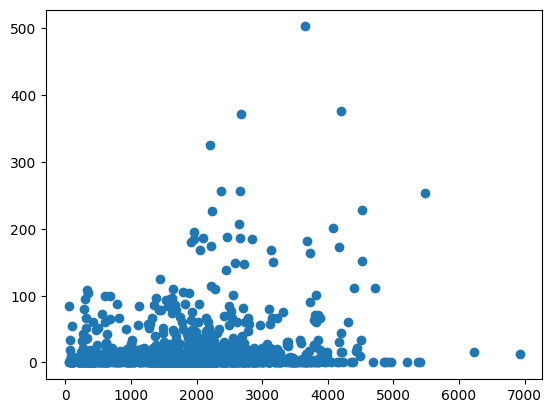

In [300]:
plt.scatter(x=df['Flight Distance'], y = df['Departure Delay in Minutes'])

# Standardization of data

## Z-Score Normalization

In [301]:
df['Departure Delay in Minutes NORM'] = (df['Departure Delay in Minutes'] - df['Departure Delay in Minutes'].mean()) / df['Departure Delay in Minutes'].std()

In [302]:
df['Flight Distance NORM'] = (df['Flight Distance'] - df['Flight Distance'].mean()) / df['Flight Distance'].std()

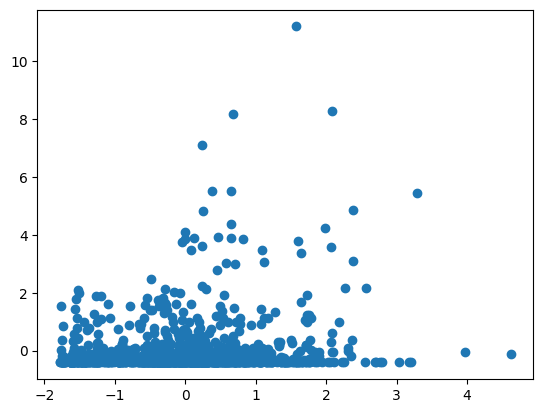

In [303]:
plt.scatter(x=df['Flight Distance NORM'], y = df['Departure Delay in Minutes NORM'])

## Min-Max Normalization

In [304]:
df['Departure Delay in Minutes MAX'] = df['Departure Delay in Minutes'] / df['Departure Delay in Minutes'].max()

In [305]:
df['Flight Distance MAX'] = df['Flight Distance'] / df['Flight Distance'].max()

Text(0, 0.5, 'Departure Delay in Minutes (Standardized)')

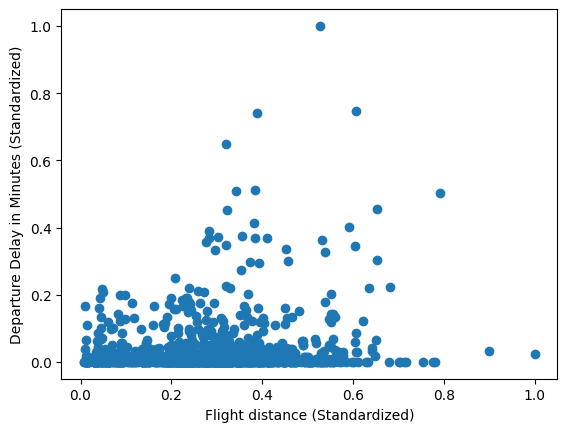

In [306]:
plt.scatter(x=df['Flight Distance MAX'], y = df['Departure Delay in Minutes MAX'])
plt.xlabel('Flight distance (Standardized)')
plt.ylabel('Departure Delay in Minutes (Standardized)')

# Cost Function Calculation

In [307]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    
    total_cost = 0

    # summation
    h = 0
    
    for i in range(m):
            h += ((((w*(x.iloc[i]))+b)-(y.iloc[i]))**2)

    # finalisation equation
    total_cost = (1/(2*m))*h
    

    return total_cost

# Differentiation and Gradient Calculation

In [308]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    # summation for b
    hb = 0 
    
    for i in range(m):
        hb += (((w*(x.iloc[i]))+b)-(y.iloc[i]))

    # rest of equation
    dj_db = (1/m)*hb
    
    
    # summation for w
    hw = 0
    
    for i in range(m):
        hw += (((w*(x.iloc[i]))+b)-(y.iloc[i]))*(x.iloc[i])

    # rest of equation
    dj_dw = (1/m)*hw  

        
    return dj_dw, dj_db

# Gradient Descent

In [309]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    
    # Storing data for learning curve plot
    yplot = []
    xplot = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        # Update the parameters
        w_temp = w - alpha * dj_dw
        b_temp = b - alpha * dj_db

        w = w_temp
        b = b_temp

        # printing the cost every 10 iterations
        if i % 10 == 0:
            cost = compute_cost(x, y, w, b)
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")
            yplot.append(cost)
            xplot.append(i)
            
    plt.plot(xplot, yplot)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("Learning Curve")
    plt.show()

    return w, b, yplot, xplot

# Defining Training Data

In [310]:
x = df['Flight Distance MAX']
y = df['Departure Delay in Minutes MAX']

# Initial values of w and b

In [311]:
w = 0
b = 0

# Inserting the Learning Rate and Number of Iterations

In [312]:
# Learning rate
alpha = 1

# Number of iterations
num_iters = 125

# Training the Model

Iteration 0: Cost 0.0036921180034913625, w 0.012013817729096262, b 0.03522664015904572
Iteration 10: Cost 0.0036644983149023524, w 0.025941754319162163, b 0.028249002484059847
Iteration 20: Cost 0.003649626122190257, w 0.037695777523142134, b 0.024841331397500444
Iteration 30: Cost 0.0036401358385945107, w 0.047085194730406975, b 0.022119195752437416
Iteration 40: Cost 0.003634079873312787, w 0.05458570361677251, b 0.019944683517547045
Iteration 50: Cost 0.003630215424466389, w 0.060577303767516716, b 0.018207627001548758
Iteration 60: Cost 0.003627749431979374, w 0.06536354866240057, b 0.016820021408276837
Iteration 70: Cost 0.0036261758262240043, w 0.06918692465836994, b 0.015711566234397272
Iteration 80: Cost 0.003625171672688915, w 0.07224113611800094, b 0.014826103622789305
Iteration 90: Cost 0.0036245308995355415, w 0.07468091908728651, b 0.014118773227270048
Iteration 100: Cost 0.003624122007648259, w 0.07662988071482724, b 0.013553739445079201
Iteration 110: Cost 0.003623861084

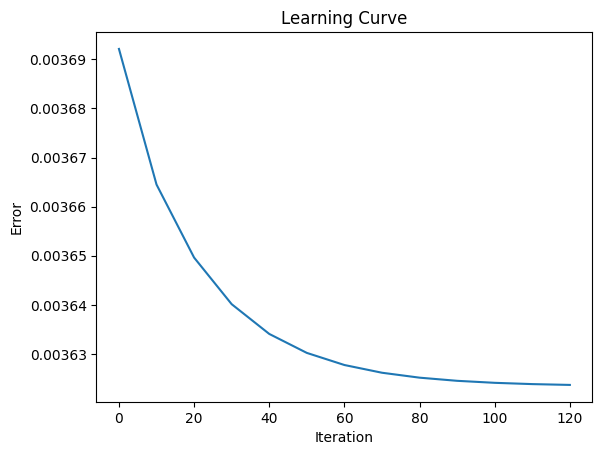

Optimized w: 0.0799, Optimized b: 0.0126


In [313]:
w, b, yplot, xplot = gradient_descent(x, y, w, b, alpha, num_iters)

print(f"Optimized w: {w.round(4)}, Optimized b: {b.round(4)}")

# Prediction Functionality

In [314]:
def predict(input):
    scale_input = input / 6244
    prediction_output = (scale_input * w) + b
    scaled_output = prediction_output * 298
    minutes = int(scaled_output)
    seconds = int((scaled_output - minutes) * 60)
    print(f"The Expected Delay in Departure Time is: {minutes} minutes {seconds} seconds")

    closest_value_index = (df["Flight Distance"] - input).abs().idxmin()

    closest_row = df.loc[closest_value_index]
    print()
    print()
    print("Closest Historical Value:")
    print()
    print(closest_row[["Departure Delay in Minutes", "Flight Distance"]])

# Employing the Model

In [321]:
# the number in brackets represents your input for the flight distance
predict(1000)

The Expected Delay in Departure Time is: 7 minutes 34 seconds


Closest Historical Value:

Departure Delay in Minutes       0.0
Flight Distance               1001.0
Name: 78192, dtype: float64
